# Detectron2 Beginner's Tutorial

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Welcome to detectron2! This is the official colab tutorial of detectron2. Here, we will go through some basics usage of detectron2, including the following:
* Run inference on images or videos, with an existing detectron2 model
* Train a detectron2 model on a new dataset

You can make a copy of this tutorial by "File -> Open in playground mode" and make changes there. __DO NOT__ request access to this tutorial.


# 패키지 설치 detectron2

In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-tngstjpm
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-tngstjpm
  Resolved https://github.com/facebookresearch/detectron2.git to commit cc9266c2396d5545315e3601027ba4bc28e8c95b
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=6147636 sha256=a9f5ef74e93199ea5546cf9171a5

In [ ]:
import torch
import detectron2

In [ ]:
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("cuda: ", CUDA_VERSION)
print("torch: ", TORCH_VERSION)
print("detectron2:", detectron2.__version__)

cuda:  cu121
torch:  2.2
detectron2: 0.6


In [ ]:
# Some basic setup:
# Setup detectron2 logger
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Mask R-CNN 모델 사용하기

https://github.com/facebookresearch/detectron2/blob/main/MODEL_ZOO.md

## COCO Instance Segmentation Baselines with Mask R-CNN


<table><tbody>


<tr><th valign="bottom">Name</th>
<th valign="bottom">epochs</th>
<th valign="bottom">train<br>time<br>(s/im)</th>
<th valign="bottom">inference<br>time<br>(s/im)</th>
<th valign="bottom">box<br>AP</th>
<th valign="bottom">mask<br>AP</th>
<th valign="bottom">model id</th>
<th valign="bottom">download</th>


 </tr><tr><td align="left"><a href="/facebookresearch/detectron2/blob/main/configs/new_baselines/mask_rcnn_R_50_FPN_100ep_LSJ.py">R50-FPN</a></td>
<td align="center">100</td>
<td align="center">0.376</td>
<td align="center">0.069</td>
<td align="center">44.6</td>
<td align="center">40.3</td>
<td align="center">42047764</td>
<td align="center"><a href="https://dl.fbaipublicfiles.com/detectron2/new_baselines/mask_rcnn_R_50_FPN_100ep_LSJ/42047764/model_final_bb69de.pkl" rel="nofollow">model</a>&nbsp;|&nbsp;<a href="https://dl.fbaipublicfiles.com/detectron2/new_baselines/mask_rcnn_R_50_FPN_100ep_LSJ/42047764/metrics.json" rel="nofollow">metrics</a></td>
</tr>

 <tr><td align="left"><a href="/facebookresearch/detectron2/blob/main/configs/new_baselines/mask_rcnn_R_50_FPN_200ep_LSJ.py">R50-FPN</a></td>
<td align="center">200</td>
<td align="center">0.376</td>
<td align="center">0.069</td>
<td align="center">46.3</td>
<td align="center">41.7</td>
<td align="center">42047638</td>
<td align="center"><a href="https://dl.fbaipublicfiles.com/detectron2/new_baselines/mask_rcnn_R_50_FPN_200ep_LSJ/42047638/model_final_89a8d3.pkl" rel="nofollow">model</a>&nbsp;|&nbsp;<a href="https://dl.fbaipublicfiles.com/detectron2/new_baselines/mask_rcnn_R_50_FPN_200ep_LSJ/42047638/metrics.json" rel="nofollow">metrics</a></td>
</tr>

 <tr><td align="left"><a href="/facebookresearch/detectron2/blob/main/configs/new_baselines/mask_rcnn_R_50_FPN_400ep_LSJ.py">R50-FPN</a></td>
<td align="center">400</td>
<td align="center">0.376</td>
<td align="center">0.069</td>
<td align="center">47.4</td>
<td align="center">42.5</td>
<td align="center">42019571</td>
<td align="center"><a href="https://dl.fbaipublicfiles.com/detectron2/new_baselines/mask_rcnn_R_50_FPN_400ep_LSJ/42019571/model_final_14d201.pkl" rel="nofollow">model</a>&nbsp;|&nbsp;<a href="https://dl.fbaipublicfiles.com/detectron2/new_baselines/mask_rcnn_R_50_FPN_400ep_LSJ/42019571/metrics.json" rel="nofollow">metrics</a></td>
</tr>

 <tr><td align="left"><a href="/facebookresearch/detectron2/blob/main/configs/new_baselines/mask_rcnn_R_101_FPN_100ep_LSJ.py">R101-FPN</a></td>
<td align="center">100</td>
<td align="center">0.518</td>
<td align="center">0.073</td>
<td align="center">46.4</td>
<td align="center">41.6</td>
<td align="center">42025812</td>
<td align="center"><a href="https://dl.fbaipublicfiles.com/detectron2/new_baselines/mask_rcnn_R_101_FPN_100ep_LSJ/42025812/model_final_4f7b58.pkl" rel="nofollow">model</a>&nbsp;|&nbsp;<a href="https://dl.fbaipublicfiles.com/detectron2/new_baselines/mask_rcnn_R_101_FPN_100ep_LSJ/42025812/metrics.json" rel="nofollow">metrics</a></td>
</tr>

 <tr><td align="left"><a href="/facebookresearch/detectron2/blob/main/configs/new_baselines/mask_rcnn_R_101_FPN_200ep_LSJ.py">R101-FPN</a></td>
<td align="center">200</td>
<td align="center">0.518</td>
<td align="center">0.073</td>
<td align="center">48.0</td>
<td align="center">43.1</td>
<td align="center">42131867</td>
<td align="center"><a href="https://dl.fbaipublicfiles.com/detectron2/new_baselines/mask_rcnn_R_101_FPN_200ep_LSJ/42131867/model_final_0bb7ae.pkl" rel="nofollow">model</a>&nbsp;|&nbsp;<a href="https://dl.fbaipublicfiles.com/detectron2/new_baselines/mask_rcnn_R_101_FPN_200ep_LSJ/42131867/metrics.json" rel="nofollow">metrics</a></td>
</tr>

 <tr><td align="left"><a href="/facebookresearch/detectron2/blob/main/configs/new_baselines/mask_rcnn_R_101_FPN_400ep_LSJ.py">R101-FPN</a></td>
<td align="center">400</td>
<td align="center">0.518</td>
<td align="center">0.073</td>
<td align="center">48.9</td>
<td align="center">43.7</td>
<td align="center">42073830</td>
<td align="center"><a href="https://dl.fbaipublicfiles.com/detectron2/new_baselines/mask_rcnn_R_101_FPN_400ep_LSJ/42073830/model_final_f96b26.pkl" rel="nofollow">model</a>&nbsp;|&nbsp;<a href="https://dl.fbaipublicfiles.com/detectron2/new_baselines/mask_rcnn_R_101_FPN_400ep_LSJ/42073830/metrics.json" rel="nofollow">metrics</a></td>
</tr>

 <tr><td align="left"><a href="/facebookresearch/detectron2/blob/main/configs/new_baselines/mask_rcnn_regnetx_4gf_dds_FPN_100ep_LSJ.py">regnetx_4gf_dds_FPN</a></td>
<td align="center">100</td>
<td align="center">0.474</td>
<td align="center">0.071</td>
<td align="center">46.0</td>
<td align="center">41.3</td>
<td align="center">42047771</td>
<td align="center"><a href="https://dl.fbaipublicfiles.com/detectron2/new_baselines/mask_rcnn_regnetx_4gf_dds_FPN_100ep_LSJ/42047771/model_final_b7fbab.pkl" rel="nofollow">model</a>&nbsp;|&nbsp;<a href="https://dl.fbaipublicfiles.com/detectron2/new_baselines/mask_rcnn_regnetx_4gf_dds_FPN_100ep_LSJ/42047771/metrics.json" rel="nofollow">metrics</a></td>
</tr>

 <tr><td align="left"><a href="/facebookresearch/detectron2/blob/main/configs/new_baselines/mask_rcnn_regnetx_4gf_dds_FPN_200ep_LSJ.py">regnetx_4gf_dds_FPN</a></td>
<td align="center">200</td>
<td align="center">0.474</td>
<td align="center">0.071</td>
<td align="center">48.1</td>
<td align="center">43.1</td>
<td align="center">42132721</td>
<td align="center"><a href="https://dl.fbaipublicfiles.com/detectron2/new_baselines/mask_rcnn_regnetx_4gf_dds_FPN_200ep_LSJ/42132721/model_final_5d87c1.pkl" rel="nofollow">model</a>&nbsp;|&nbsp;<a href="https://dl.fbaipublicfiles.com/detectron2/new_baselines/mask_rcnn_regnetx_4gf_dds_FPN_200ep_LSJ/42132721/metrics.json" rel="nofollow">metrics</a></td>
</tr>

 <tr><td align="left"><a href="/facebookresearch/detectron2/blob/main/configs/new_baselines/mask_rcnn_regnetx_4gf_dds_FPN_400ep_LSJ.py">regnetx_4gf_dds_FPN</a></td>
<td align="center">400</td>
<td align="center">0.474</td>
<td align="center">0.071</td>
<td align="center">48.6</td>
<td align="center">43.5</td>
<td align="center">42025447</td>
<td align="center"><a href="https://dl.fbaipublicfiles.com/detectron2/new_baselines/mask_rcnn_regnetx_4gf_dds_FPN_400ep_LSJ/42025447/model_final_f1362d.pkl" rel="nofollow">model</a>&nbsp;|&nbsp;<a href="https://dl.fbaipublicfiles.com/detectron2/new_baselines/mask_rcnn_regnetx_4gf_dds_FPN_400ep_LSJ/42025447/metrics.json" rel="nofollow">metrics</a></td>
</tr>

 <tr><td align="left"><a href="/facebookresearch/detectron2/blob/main/configs/new_baselines/mask_rcnn_regnety_4gf_dds_FPN_100ep_LSJ.py">regnety_4gf_dds_FPN</a></td>
<td align="center">100</td>
<td align="center">0.487</td>
<td align="center">0.073</td>
<td align="center">46.1</td>
<td align="center">41.6</td>
<td align="center">42047784</td>
<td align="center"><a href="https://dl.fbaipublicfiles.com/detectron2/new_baselines/mask_rcnn_regnety_4gf_dds_FPN_100ep_LSJ/42047784/model_final_6ba57e.pkl" rel="nofollow">model</a>&nbsp;|&nbsp;<a href="https://dl.fbaipublicfiles.com/detectron2/new_baselines/mask_rcnn_regnety_4gf_dds_FPN_100ep_LSJ/42047784/metrics.json" rel="nofollow">metrics</a></td>
</tr>

 <tr><td align="left"><a href="/facebookresearch/detectron2/blob/main/configs/new_baselines/mask_rcnn_regnety_4gf_dds_FPN_200ep_LSJ.py">regnety_4gf_dds_FPN</a></td>
<td align="center">200</td>
<td align="center">0.487</td>
<td align="center">0.072</td>
<td align="center">47.8</td>
<td align="center">43.0</td>
<td align="center">42047642</td>
<td align="center"><a href="https://dl.fbaipublicfiles.com/detectron2/new_baselines/mask_rcnn_regnety_4gf_dds_FPN_200ep_LSJ/42047642/model_final_27b9c1.pkl" rel="nofollow">model</a>&nbsp;|&nbsp;<a href="https://dl.fbaipublicfiles.com/detectron2/new_baselines/mask_rcnn_regnety_4gf_dds_FPN_200ep_LSJ/42047642/metrics.json" rel="nofollow">metrics</a></td>
</tr>

 <tr><td align="left"><a href="/facebookresearch/detectron2/blob/main/configs/new_baselines/mask_rcnn_regnety_4gf_dds_FPN_400ep_LSJ.py">regnety_4gf_dds_FPN</a></td>
<td align="center">400</td>
<td align="center">0.487</td>
<td align="center">0.072</td>
<td align="center">48.2</td>
<td align="center">43.3</td>
<td align="center">42045954</td>
<td align="center"><a href="https://dl.fbaipublicfiles.com/detectron2/new_baselines/mask_rcnn_regnety_4gf_dds_FPN_400ep_LSJ/42045954/model_final_ef3a80.pkl" rel="nofollow">model</a>&nbsp;|&nbsp;<a href="https://dl.fbaipublicfiles.com/detectron2/new_baselines/mask_rcnn_regnety_4gf_dds_FPN_400ep_LSJ/42045954/metrics.json" rel="nofollow">metrics</a></td>
</tr>
</tbody></table>

https://github.com/facebookresearch/detectron2/tree/main/configs/COCO-InstanceSegmentation

* mask_rcnn_R_101_C4_3x.yaml
* mask_rcnn_R_101_DC5_3x.yaml
* mask_rcnn_R_101_FPN_3x.yaml
* mask_rcnn_R_50_C4_1x.py
* mask_rcnn_R_50_C4_1x.yaml
* mask_rcnn_R_50_C4_3x.yaml
* mask_rcnn_R_50_DC5_1x.yaml
* mask_rcnn_R_50_DC5_3x.yaml
* mask_rcnn_R_50_FPN_1x.py
* mask_rcnn_R_50_FPN_1x.yaml
* mask_rcnn_R_50_FPN_1x_giou.yaml
* mask_rcnn_R_50_FPN_3x.yaml
* mask_rcnn_X_101_32x8d_FPN_3x.yaml
* mask_rcnn_regnetx_4gf_dds_fpn_1x.py
* mask_rcnn_regnety_4gf_dds_fpn_1x.py


## 모델 구조 불러오기

In [ ]:
cfg = get_cfg()

In [ ]:
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))

In [ ]:
print(cfg)

CUDNN_BENCHMARK: False
DATALOADER:
  ASPECT_RATIO_GROUPING: True
  FILTER_EMPTY_ANNOTATIONS: True
  NUM_WORKERS: 4
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: ()
  PROPOSAL_FILES_TRAIN: ()
  TEST: ('coco_2017_val',)
  TRAIN: ('coco_2017_train',)
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: False
    SIZE: [0.9, 0.9]
    TYPE: relative_range
  FORMAT: BGR
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN: (640, 672, 704, 736, 768, 800)
  MIN_SIZE_TRAIN_SAMPLING: choice
  RANDOM_FLIP: horizontal
MODEL:
  ANCHOR_GENERATOR:
    ANGLES: [[-90, 0, 90]]
    ASPECT_RATIOS: [[0.5, 1.0, 2.0]]
    NAME: DefaultAnchorGenerator
    OFFSET: 0.0
    SIZES: [[32], [64], [128], [256], [512]]
  BACKBONE:
    FREEZE_AT: 2
    NAME: build_resnet_fpn_backbone
  DEVICE: cuda
  FPN:
    FUSE_TYPE: sum
    IN_FEATURES: ['res2', 

## 사전 학습된 weightes 불러오기

In [ ]:
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")

## 모델 빌드

In [ ]:
predictor = DefaultPredictor(cfg)

[03/19 11:11:20 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x/138205316/model_final_a3ec72.pkl ...


model_final_a3ec72.pkl: 254MB [00:02, 97.1MB/s]                           


## 추론하기

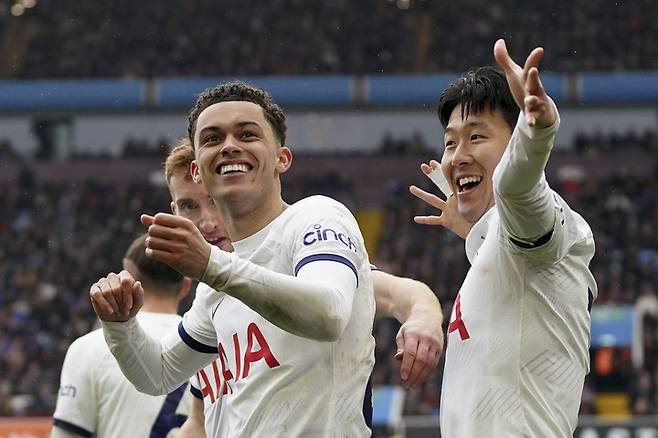

In [ ]:
!wget https://img4.daumcdn.net/thumb/R658x0.q70/?fname=https://t1.daumcdn.net/news/202403/17/HockeyNewsKorea/20240317130006591xrkx.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
cv2_imshow(im)

In [ ]:
outputs = predictor(im)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 0,  0,  0, 67,  0,  0,  0,  0, 67,  0,  0,  0,  0, 52, 67,  0, 13, 67],
       device='cuda:0')
Boxes(tensor([[ 89.5208,  87.0660, 390.9467, 432.7911],
        [402.5611,  43.9708, 598.5345, 433.7579],
        [ 46.8476, 314.3340, 191.7965, 434.2358],
        [423.9413, 161.8096, 450.9392, 200.9085],
        [ 53.2407, 175.0810, 225.1765, 435.4331],
        [630.8607, 280.0961, 657.2444, 413.5983],
        [164.8834, 141.8066, 231.6772, 242.1259],
        [372.3986, 262.8364, 442.9452, 392.2565],
        [143.3302, 207.7067, 170.2303, 216.4285],
        [138.2711, 144.1505, 239.1490, 310.9733],
        [ 89.7757, 227.7043, 195.4020, 438.0000],
        [121.3905, 234.6867, 192.2962, 323.3205],
        [576.3317, 343.7521, 644.5457, 425.9602],
        [423.0701, 162.1354, 450.7093, 200.4431],
        [142.2052, 210.0589, 163.6270, 217.3321],
        [150.4602, 117.7933, 276.4390, 431.9909],
        [ 56.2388, 109.8919, 187.9801, 158.4890],
        [141.1316, 204.4779, 172.9297, 

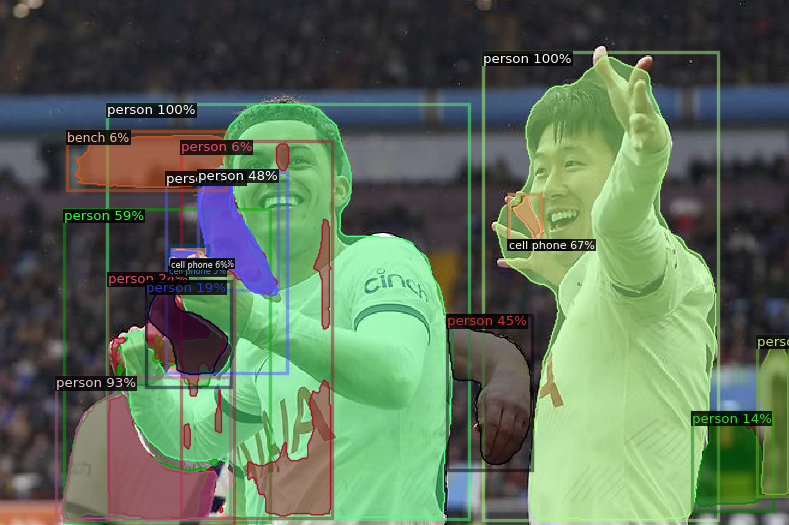

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

## 정확한 결과만 출력하기

In [ ]:
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
predictor = DefaultPredictor(cfg)

[03/19 11:20:28 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x/138205316/model_final_a3ec72.pkl ...


In [ ]:
outputs = predictor(im)

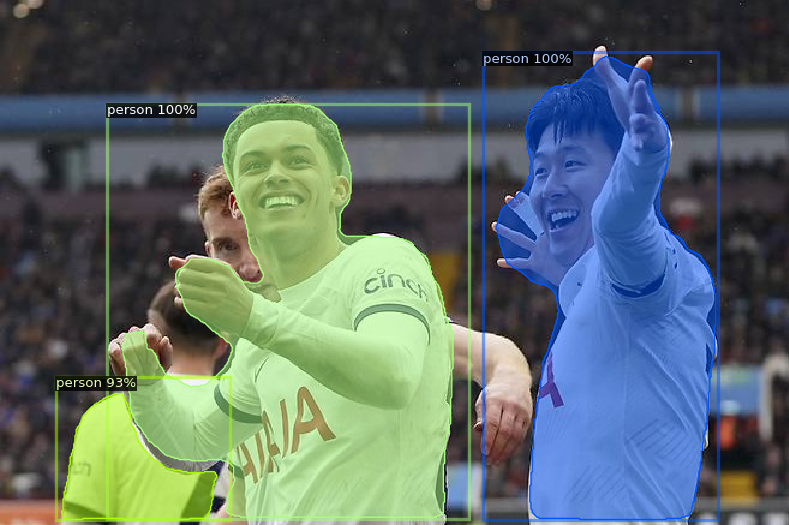

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

# Keypoint Model

![](https://viso.ai/wp-content/uploads/2021/01/Keypoints-Detected-by-OpenPose-on-the-COCO-Dataset.jpg)

[03/19 11:21:59 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x/138363331/model_final_997cc7.pkl ...


model_final_997cc7.pkl: 313MB [00:03, 82.6MB/s]                          


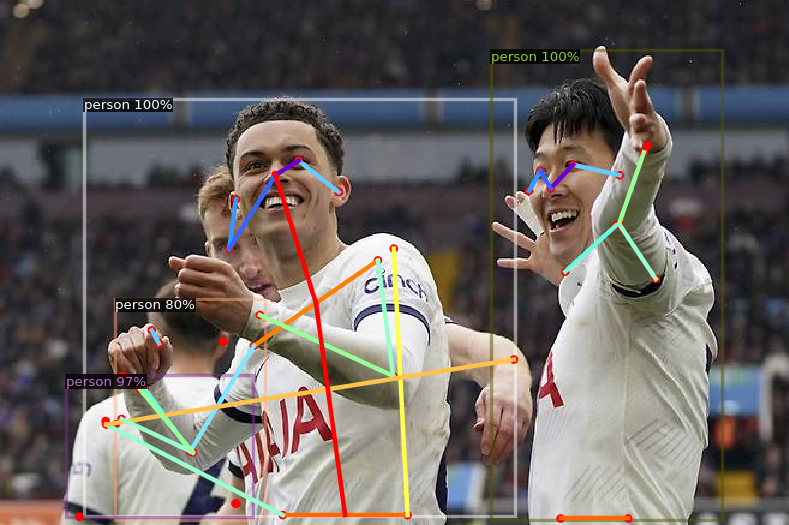

In [ ]:
# Inference with a keypoint detection model
cfg = get_cfg()   # get a fresh new config
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

# Panoptic Segmentation

https://arxiv.org/pdf/1801.00868.pdf

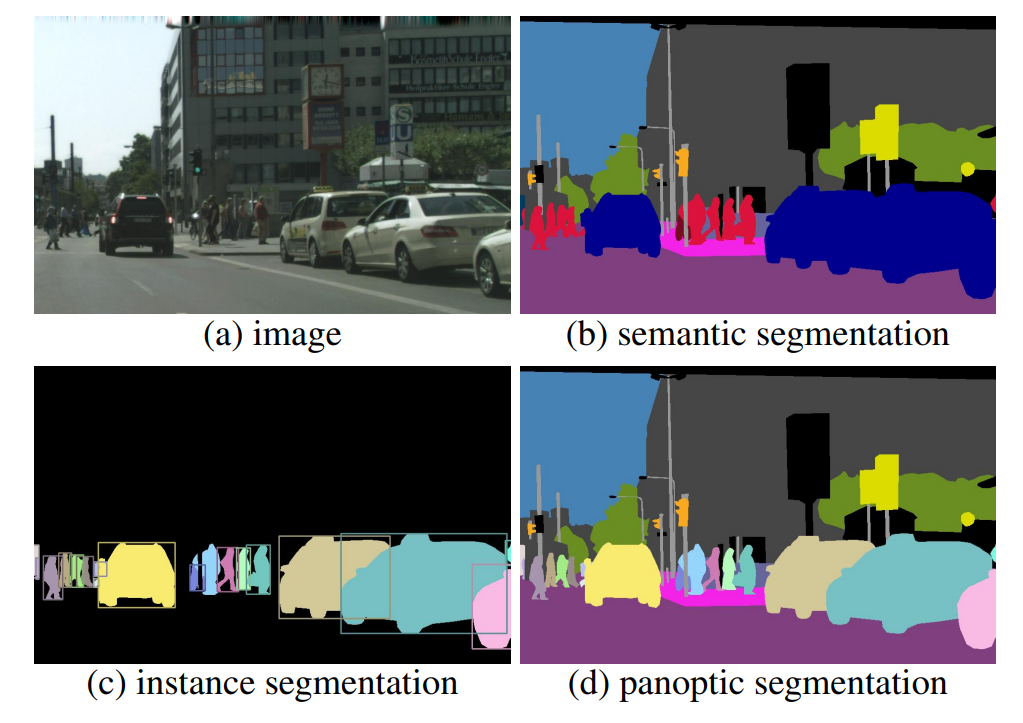

[03/19 11:24:11 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl ...


model_final_cafdb1.pkl: 261MB [00:02, 117MB/s]                           


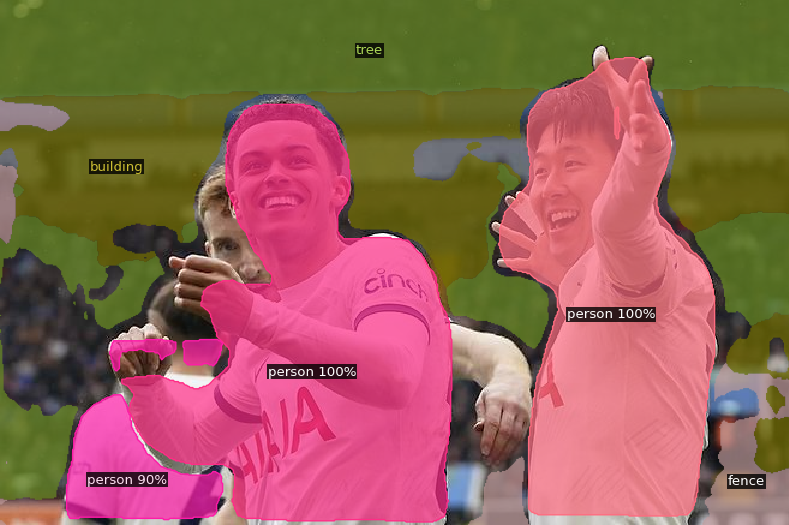

In [ ]:
# Inference with a panoptic segmentation model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
predictor = DefaultPredictor(cfg)
panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
cv2_imshow(out.get_image()[:, :, ::-1])

---